In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def initialization(in_neuron, hidden_neuron, out_neuron):
  w1 = np.random.rand(hidden_neuron,in_neuron) - 0.5
  w2 = np.random.rand(out_neuron,hidden_neuron) - 0.5
  b1 = np.zeros((hidden_neuron ,1))
  b2 = np.zeros((out_neuron,1))

  return w1,b1,w2,b2

#w1,b1,w2,b2 = initialization(2,3,2)
#print(w1) #w1=(-0.5,0.5)
#print(w2) #b1= 0
#print(b1) #w2=(-0.5,0.5)
#print(b2) #b2= 0

In [ ]:
def ReLU(z):
  return np.maximum(0,z)

#z = np.array([0.2, 0, -0.9, 0.9, -0.001,12])
#x= ReLU(z)
#print(x)
def linear(z):
  return z

def linearPrime(z):
  return 1

def reluPrime(z):
  a=ReLU(z)
  return a>0

In [ ]:
def forwardProp(a0,w1,b1,w2,b2):
  z1=np.dot(w1,a0)+b1
  a1=ReLU(z1)
  z2=np.dot(w2,a1)+b2
  a2=linear(z2)

  return z1,a1,z2,a2


#print(z1)


In [ ]:
def computeGradient(a2,y,z2,a1,w2,z1,a0):
  de2 = (a2-y)*linearPrime(z2)
  db2 = de2
  dw2 = np.dot(de2, a1.T)
  da1 = np.dot(w2.T, de2)
  de1 = da1*reluPrime(z1)
  db1 = de1
  dw1 = np.dot(de1, a0.T)

  return dw1,db1,dw2,db2

In [ ]:
def updateWeightsAndBiases(w1,b1,w2,b2,dw1,db1,dw2,db2,eta):
  w1 = w1 -eta*dw1
  b1 = b1 -eta*db1
  w2 = w2 -eta*dw2
  b2 = b2 -eta*db2

  return w1,b1,w2,b2


In [ ]:
eta = 0.1
epoch = 100
a0= np.array([0.5, 0.5]).reshape(2,1)
y = np.array([-0.5, 0.5]).reshape(2,1)

w1,b1,w2,b2 = initialization(2,10,2)
for i in range(0,epoch):
  z1,a1,z2,a2=forwardProp(a0,w1,b1,w2,b2)
  dw1,db1,dw2,db2=computeGradient(a2,y,z2,a1,w2,z1,a0)
  w1,b1,w2,b2=updateWeightsAndBiases(w1,b1,w2,b2,dw1,db1,dw2,db2,eta)

  cost =  np.sum((a2-y)**2)*0.5
  print(a2)
  print(cost)


In [ ]:
x_input = np.random.uniform(-1,1,(1000,2))
print(x_input)

rm = [[-1,0],
      [0,1]]
x_ground = np.dot(rm, x_input.T).T  ##---> This will give us reflected point but column wise
print(x_ground)

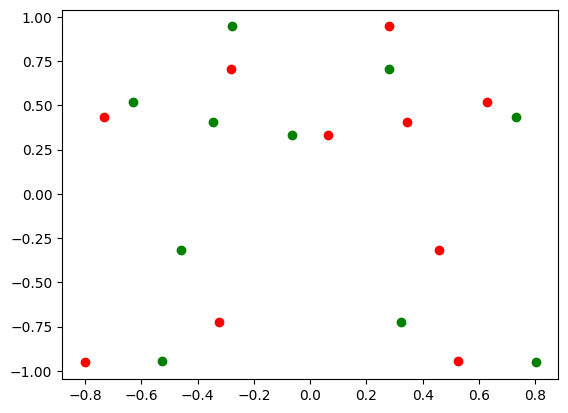

In [ ]:
plt.scatter(x_input[:,0], x_input[:,1], c='RED')
plt.scatter(x_ground[:,0], x_ground[:,1], c='GREEN')
plt.show()

In [ ]:
eta = 0.1
epoch = 100
a0= np.array([0.5, 0.5]).reshape(2,1)
y = np.array([-0.5, 0.5]).reshape(2,1)

w1,b1,w2,b2 = initialization(2,10,2)
for i in range(0,epoch):
  cost=0
  for j in range(1000):
    a0 = x_input[j,:].T.reshape(2,1)
    y = x_ground[j,:].T.reshape(2,1)
    z1,a1,z2,a2=forwardProp(a0,w1,b1,w2,b2)
    dw1,db1,dw2,db2=computeGradient(a2,y,z2,a1,w2,z1,a0)
    w1,b1,w2,b2=updateWeightsAndBiases(w1,b1,w2,b2,dw1,db1,dw2,db2,eta)

    cost = cost + np.sum((a2-y)**2)*0.5

  print(cost)

In [ ]:
test_x = np.arange(0,1,0.01)
test_y = test_x**2

test = np.column_stack([test_x, test_y])
print(test)

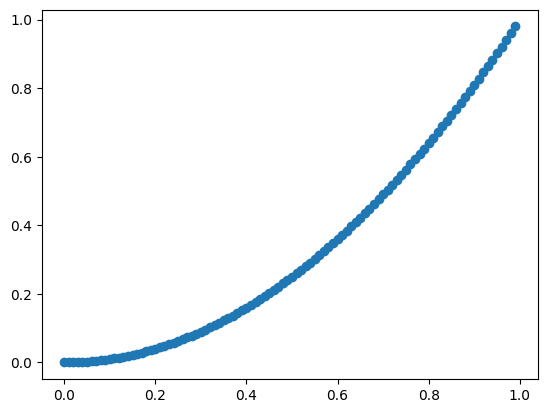

In [ ]:
plt.scatter(test_x, test_y)
plt.show()

In [ ]:
n = test.shape[0]
o_x = []
o_y = []
for i in range(n):
  a0= test[i,:].T.reshape(2,1)
  z1,a1,z2,a2=forwardProp(a0,w1,b1,w2,b2)

  o_x.append(a2[0,0])
  o_y.append(a2[1,0])


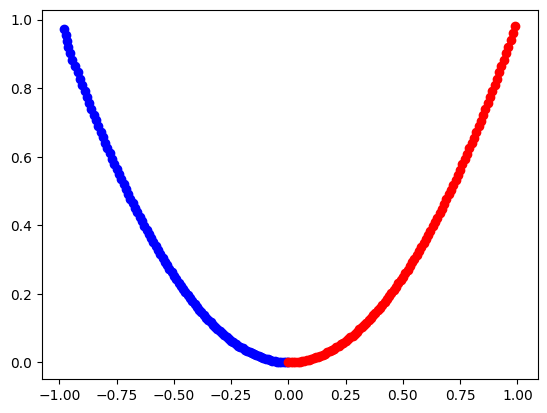

In [ ]:
plt.scatter(o_x, o_y, c='blue')
plt.scatter(test[:,0], test[:,1], c = 'red')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

dataset_path = '/content/gdrive/MyDrive/'

Mounted at /content/gdrive


In [ ]:
import pandas as pd
xtest = pd.read_csv('/content/gdrive/MyDrive/ColabNotebooks/file.csv')
xtest = np.array(xtest)

(18154, 2)


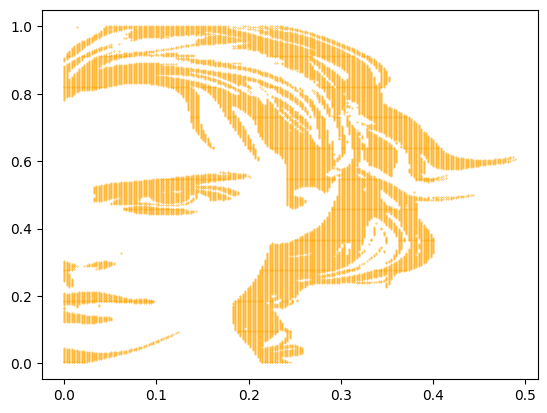

In [ ]:
print(xtest.shape)
plt.scatter(xtest[:,0], xtest[:,1],s=0.1, c= 'orange')

In [ ]:
n = xtest.shape[0]
o_x = []
o_y = []
for i in range(n):
  a0= xtest[i,:].T.reshape(2,1)
  z1,a1,z2,a2=forwardProp(a0,w1,b1,w2,b2)

  o_x.append(a2[0,0])
  o_y.append(a2[1,0])


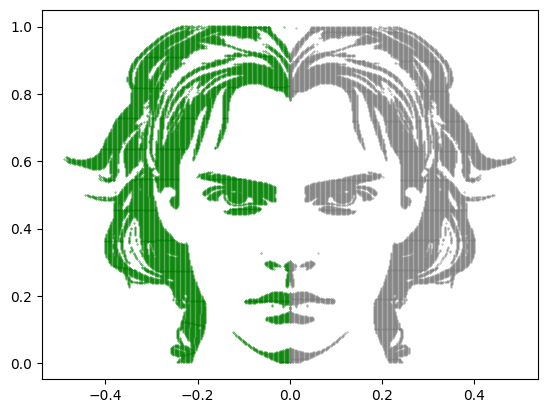

In [ ]:
plt.scatter(o_x, o_y,s=0.1, c='green')
plt.scatter(xtest[:,0], xtest[:,1],s=0.1, c = 'gray')
plt.show()